# Import software libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import math
import csv
import glob
import plotly.express as px
import os
import warnings

import math
import plotly.express as px
# Local server SQL database
import sqlite3 as sq

In [ ]:
pip install pyodbc

# Manage Directory

In [1]:
# Get working directory

import os
os.getcwd()

'C:\\Users\\A0808597\\Downloads\\Python'

In [2]:
# Change or Set Current Working Directory

import os
# os.chdir('C:\Users\YOURUSERID\Downloads') - for windows, change \ to \\

os.chdir('C:\\Users\\A0808597\\Downloads')

In [3]:
# Get working directory

import os
os.getcwd()

'C:\\Users\\A0808597\\Downloads'

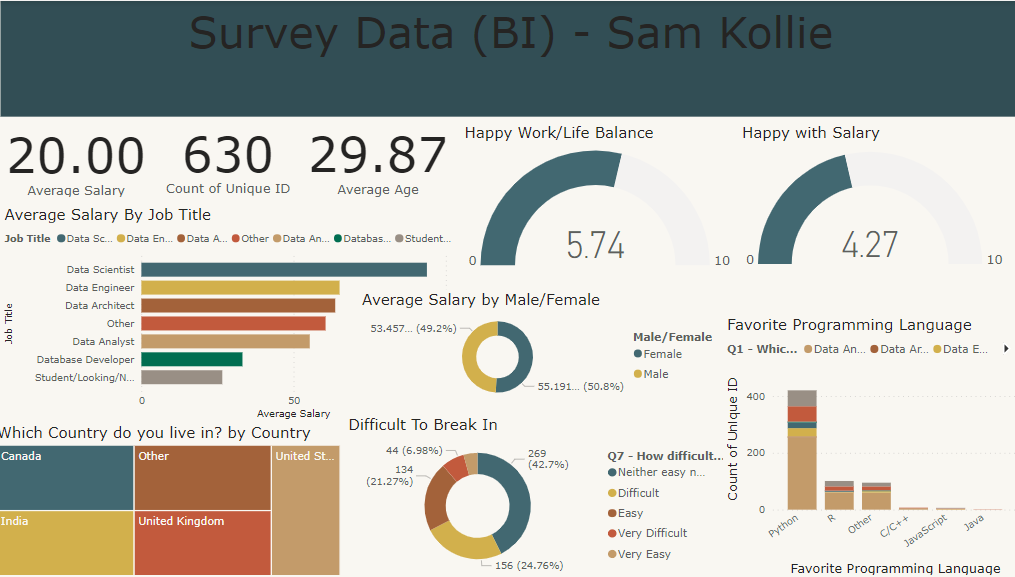

In [23]:
# Inserting image from Downloads folder.

from IPython import display

display.Image("PowerBISurveyData.png")

# Collecting Data

In [17]:
import pyodbc

In [ ]:
# Connect Python to SQL Server

# import pyodbc 

# conn = pyodbc.connect('Driver={SQL Server};'
                      # 'Server=server_name;'
                      # 'Database=database_name;'
                      # 'Trusted_Connection=yes;')

# cursor = conn.cursor()
# cursor.execute('SELECT * FROM table_name')

# for i in cursor:
    # print(i)

import pyodbc 

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=XXX;'
                      'Database=XXX;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
cursor.execute('SELECT * FROM XXX')

for i in cursor:
    print(i)

In [5]:
df = pd.read_csv("healthcare_stroke_data.csv") 

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# # Exploratory Data Analysis (EDA) & Cleaning/Wranging Raw Data


In [20]:
# print(df)

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [28]:
#The unique element present in all the categorical features
col=df[['gender','ever_married','work_type','Residence_type','smoking_status']]
for i in col:
    print(f'{i}: unique elements | {col[i].unique()}')

gender: unique elements | ['Male' 'Female' 'Other']
ever_married: unique elements | ['Yes' 'No']
work_type: unique elements | ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: unique elements | ['Urban' 'Rural']
smoking_status: unique elements | ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [6]:
# Identify data types
# print(df.dtypes) - another way to review datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
# counting null values.

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# looking at head and tail at the same time
# df.head()
# df.tail()

df.head().append(df.tail())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [21]:
# Statistical information of all the numerical features.
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
print(df.shape)

(5110, 12)


In [11]:
print('Number of features or columns: %s' %df.shape[1])
print('Number of examples or rows: %s' %df.shape[0])

Number of features or columns: 12
Number of examples or rows: 5110


In [19]:
#1 if the patient had a stroke or 0 if not
#count of 0's and 1's
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [90]:
# Exporting data into Excel
#df.to_csv('missing.csv')

<AxesSubplot:>

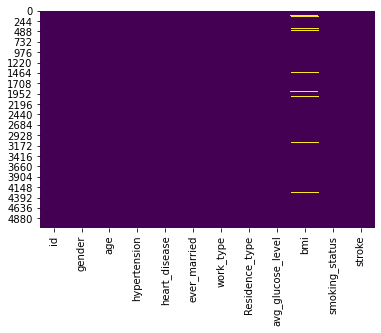

In [13]:
# heatmap for missing values

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

In [24]:
df1 = df[["bmi"]]

df1.head()

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0


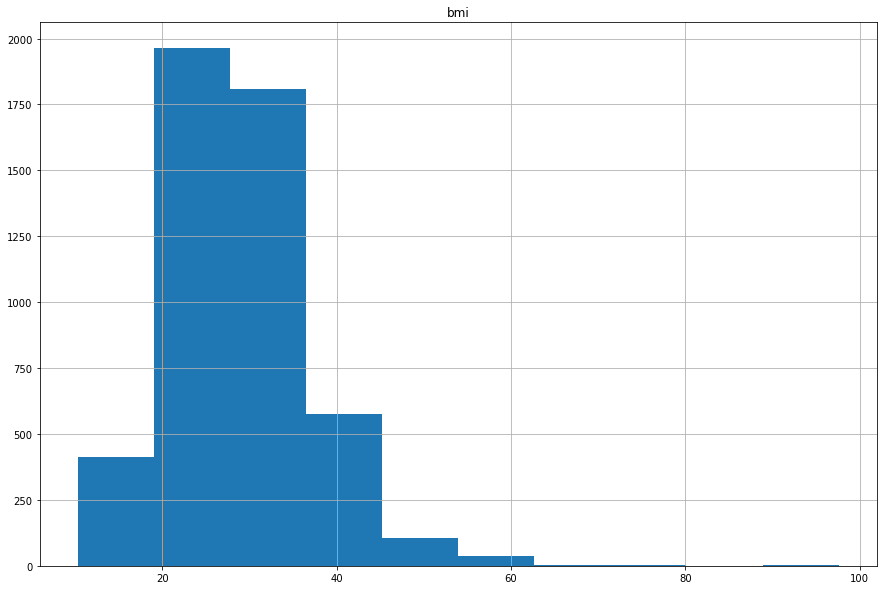

In [25]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df1.hist(ax=ax)
plt.show()

In [26]:
# filling the NaN values in df['bmi'] column with the mean value of df['bmi']
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [27]:
df['bmi'].isnull().sum()

0

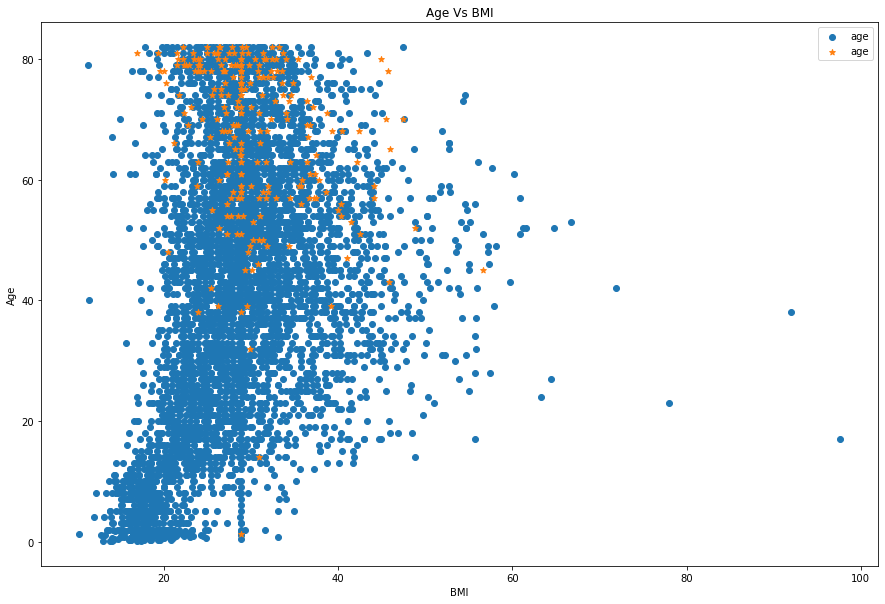

In [31]:
plt.figure(figsize=(15,10))
plt.scatter(x='bmi',y='age', data=df[df['stroke']==0])
plt.scatter(x='bmi',y='age', data=df[df['stroke']==1], marker='*')

plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Age Vs BMI')
plt.legend()
plt.show()

In [157]:
#df[''] = df[''].astype(int)
#df[''] = df[''].astype(float)
# convert to pandas datetime
#df['Quarter'] = pd.to_datetime(df['Quarter'])
#print(df.dtypes)

<AxesSubplot:>

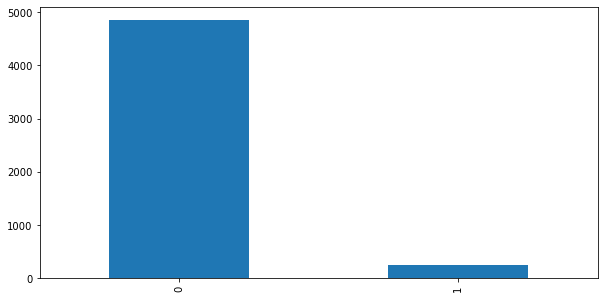

In [33]:
df.stroke.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

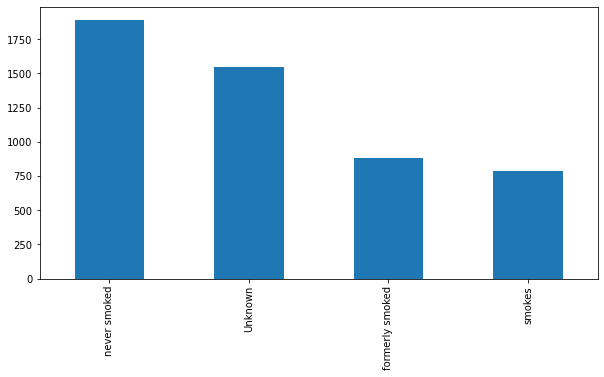

In [36]:
df.smoking_status.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

In [38]:
df1 = df[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]]

df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


<AxesSubplot:>

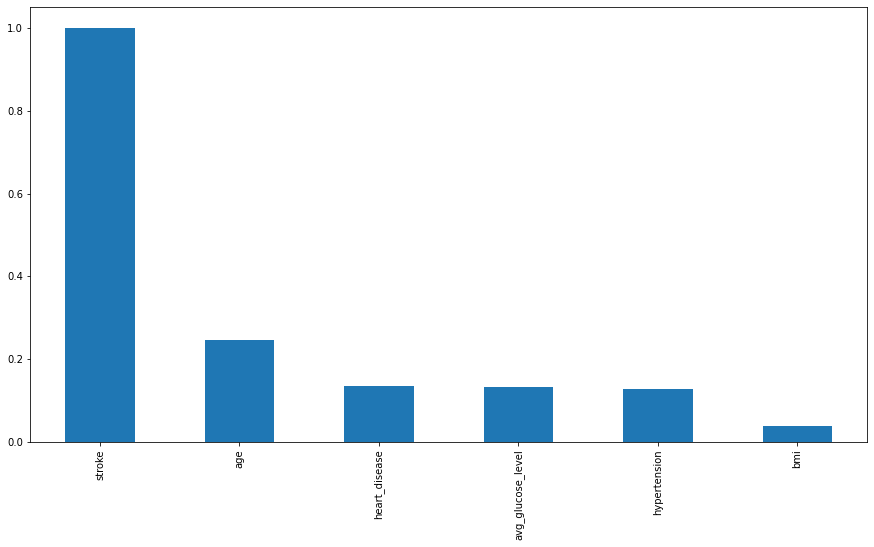

In [39]:
#Get Correlation of "stroke" with other variables:

plt.figure(figsize=(15,8))
df1.corr()['stroke'].sort_values(ascending = False).plot(kind='bar')

In [40]:
cor = df1.corr()

cor

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


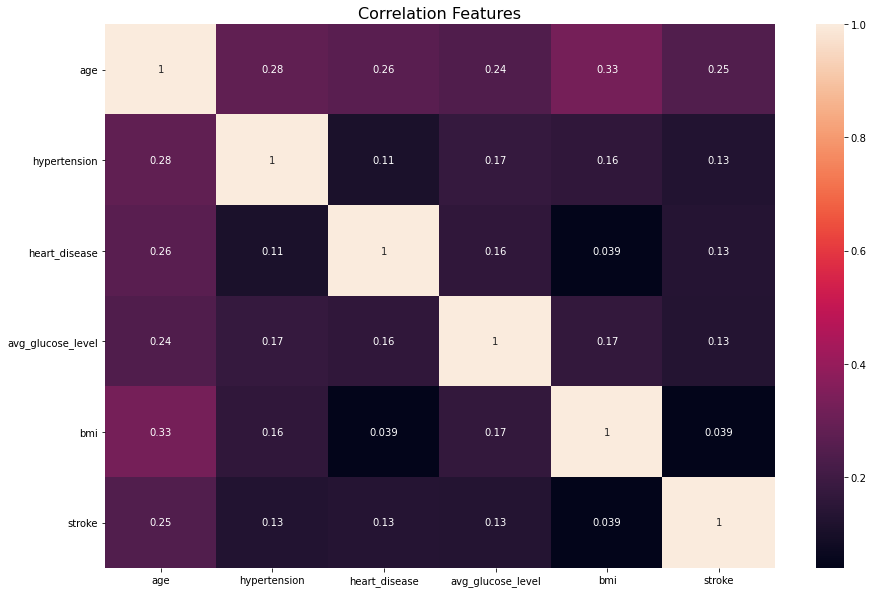

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), annot = True )
plt.title('Correlation Features', size = 16)
plt.show()

<AxesSubplot:>

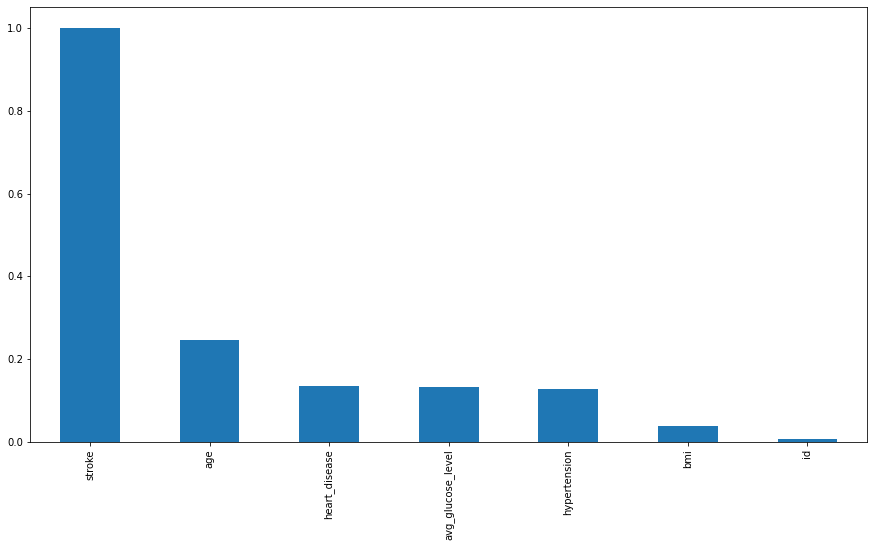

In [34]:
#Get Correlation of "stroke" with other variables:

plt.figure(figsize=(15,8))
df.corr()['stroke'].sort_values(ascending = False).plot(kind='bar')

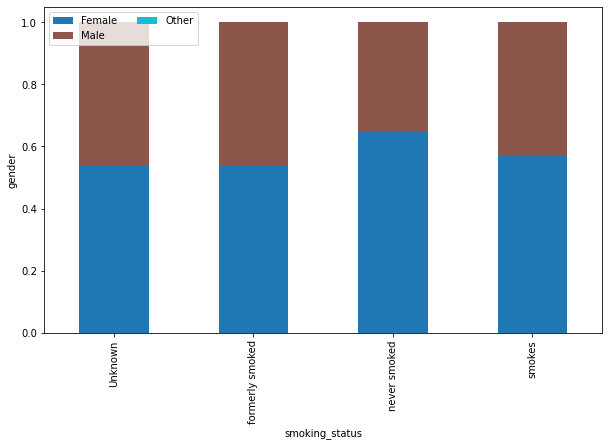

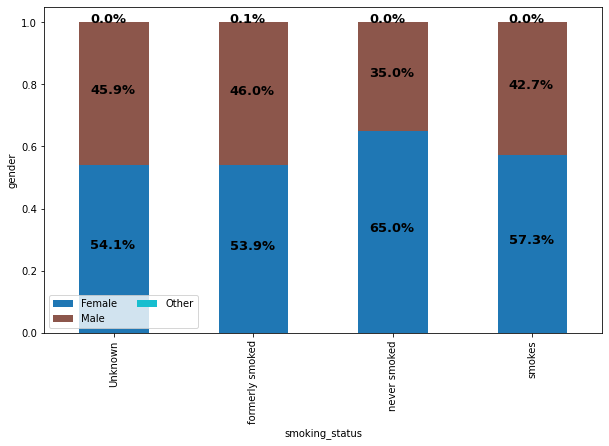

In [42]:
cross_tab_prop = pd.crosstab(index=df['smoking_status'],
                             columns=df['gender'],
                             normalize="index")
cross_tab = pd.crosstab(index=df['smoking_status'],
                        columns=df['gender'])
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("smoking_status")
plt.ylabel("gender")
plt.show()
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("smoking_status")
plt.ylabel("gender")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=13,
                 fontweight="bold")

plt.show()

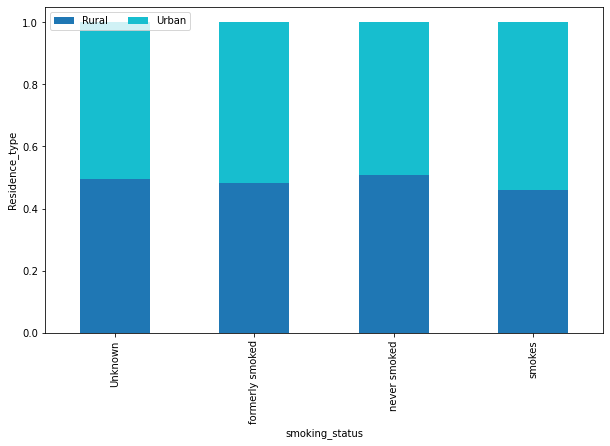

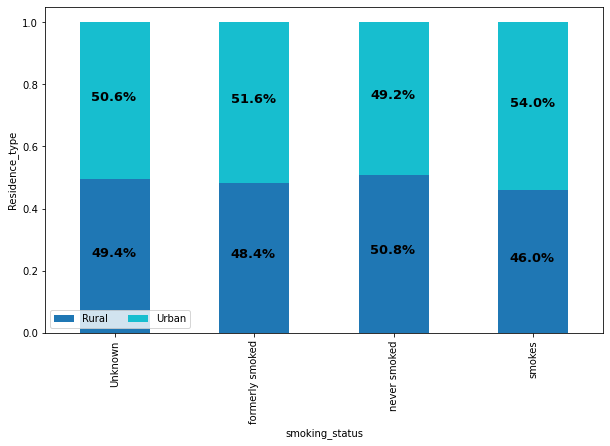

In [43]:
cross_tab_prop = pd.crosstab(index=df['smoking_status'],
                             columns=df['Residence_type'],
                             normalize="index")
cross_tab = pd.crosstab(index=df['smoking_status'],
                        columns=df['Residence_type'])
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("smoking_status")
plt.ylabel("Residence_type")
plt.show()
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("smoking_status")
plt.ylabel("Residence_type")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=13,
                 fontweight="bold")

plt.show()

In [48]:
from matplotlib.ticker import PercentFormatter

<ipython-input-49-3bdb31642648>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data["Stroke_status"], rotation=40)


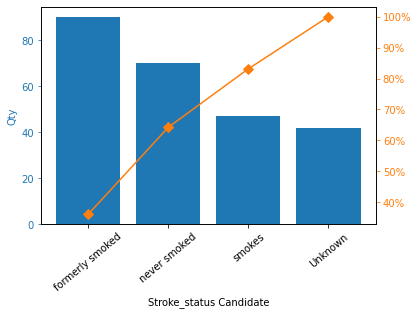

In [49]:
data = pd.DataFrame({'Stroke_status': [90, 70, 47, 42]})
data.index = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
data = data.sort_values(by='Stroke_status', ascending=False)
data["cumpercentage"] = data["Stroke_status"].cumsum()/data["Stroke_status"].sum()* 100
fig, ax1 = plt.subplots()
ax1.bar(data.index, data["Stroke_status"], color="C0")
ax1.set_ylabel("Qty", color="C0")
ax1.tick_params(axis="y", colors="C0")
ax1.set_xlabel("Stroke_status Candidate")
ax1.set_xticklabels(data["Stroke_status"], rotation=40)
ax2 = ax1.twinx()
ax2.plot(data.index, data["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis="y", colors="C1")
plt.show()